# Telco Customer Churn Dataset

##  Project Overview

The goal is to predict whether a customer will churn based on their demographics, services and payment behavior, so that the company can proactively retain high-risk customers.

## Dataset Summary

The dataset has about 7,000 customers and a mix of numerical features like tenure, MonthlyCharges, TotalCharges and categorical features like Contract, InternetService, PaymentMethod, etc. The target variable is Churn

## Importing the files

In [1]:
# Pandas for Data Manipulation
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Chrome Downloads/Business Intelligence/Project/archive/Telco-Customer-Churn.csv')

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


First, I loaded the data and checked the structure using info() and describe() to understand data types and basic statistics.

## Data Exploration

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1522,5766-XQXMQ,Female,0,No,No,29,Yes,No,DSL,Yes,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),68.85,1970.5,Yes
6296,4023-RTIQM,Female,1,Yes,No,31,No,No phone service,DSL,Yes,Yes,Yes,No,No,Yes,One year,Yes,Credit card (automatic),50.40,1580.1,No
1152,4320-QMLLA,Male,0,No,No,7,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Mailed check,54.85,370.4,No


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
duplicates =  df.duplicated()
duplicates[duplicates==True]

Series([], dtype: bool)

In [10]:
df.drop_duplicates(inplace=True)

#### There were no duplicates or null values found in the dataset

----------------------------------------------------------------------------------------------

## Outlier Detection: Tenure & Monthly Charges

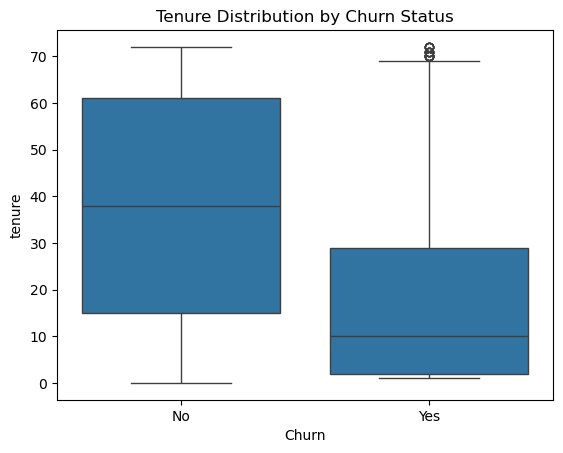

In [11]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure Distribution by Churn Status')
plt.show()

## Observation:

Left box = Customers who did NOT churn

Right box = Customers who churned

The circles above the upper whisker (right side) = outliers

Here I explored how tenure relates to churn.
We can see that churned customers tend to have lower tenure, meaning newer customers are more likely to leave. There are also a few churned customers with very high tenure, which is unusual

In [17]:
# Removing churned customers with very high tenure
df = df[~((df['Churn'] == 'Yes') & (df['tenure'] >= 50))].reset_index(drop=True)

# Optional: check new max churn tenure
df[df['Churn'] == 'Yes']['tenure'].max()


49

## After cleaning, the highest churn tenure is now 49 months

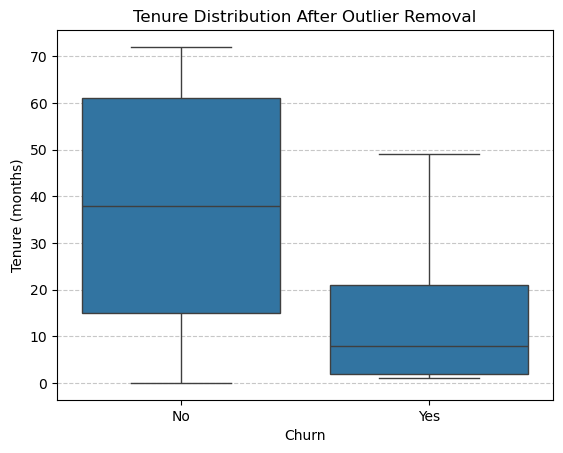

In [18]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure Distribution After Outlier Removal')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

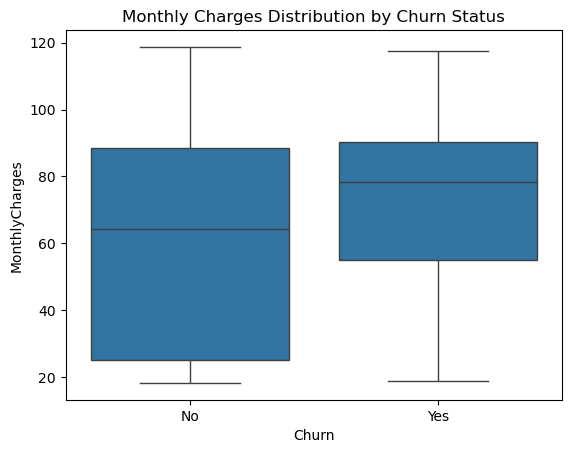

In [19]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges Distribution by Churn Status')
plt.show()

## Outlier Analysis

Used boxplots for visual detection

Tenure shows outliers among churned customers (high tenure ~65–70 months)

MonthlyCharges shows no visible outliers

Interpretation:
High-tenure churners represent unusual behavior and appear as outliers

Outlier detection was applied only to continuous variables, such as tenure. Binary variables such as SeniorCitizen (0/1) do not have a meaningful notion of outliers and were therefore excluded from outlier analysis.

## Finding out how many customers are on month to month basis

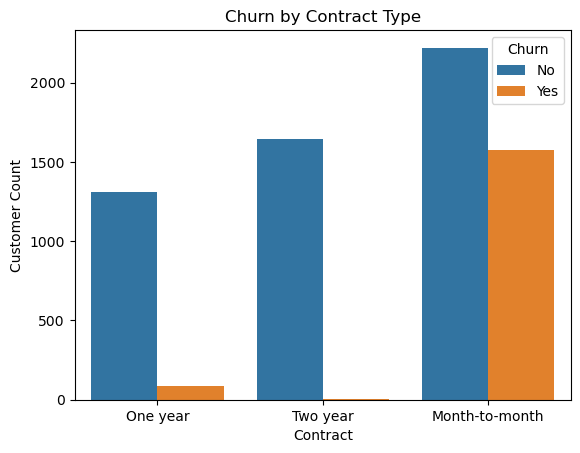

In [21]:
# Step 1: Count and sort
contract_order = df['Contract'].value_counts().sort_values(ascending=True).index

# Step 2: Plot with sorted order
sns.countplot(x='Contract', hue='Churn', data=df, order=contract_order)
plt.title('Churn by Contract Type')
plt.ylabel('Customer Count')
plt.show()

In [22]:
df.groupby('Contract')['Churn'].value_counts(normalize=True).round(2)

Contract        Churn
Month-to-month  No       0.58
                Yes      0.42
One year        No       0.94
                Yes      0.06
Two year        No       1.00
                Yes      0.00
Name: proportion, dtype: float64

### Contract Type vs Churn – Analysis

The table below summarizes churn proportions for each contract type. Values are normalized within each contract group, showing the percentage of customers who churned or stayed:

**Key Observations:**

- **Month-to-Month contracts have the highest churn rate (42%)**, indicating that these customers are more likely to cancel at any time due to minimal commitment.
- **One-Year contracts show significantly better retention**, with only around **6% churn**. This suggests that medium-term contracts provide a stabilizing effect on customer behavior.
- **Two-Year contracts are the most stable**, with a churn rate close to **0%**. Customers on long-duration plans tend to remain loyal, likely because of incentive-driven pricing or early termination penalties.
- **Contract length is a strong predictor of churn behavior.** Longer contracts clearly reduce churn, supporting the idea that commitment and incentives improve retention.
- **Business Insight:** Telco companies should consider offering loyalty perks, discounts, or targeted retention campaigns for Month-to-Month customers to nudge them toward longer-term plans and reduce churn.



# Higher monthly charges might indicate financial strain or premium plans

In [23]:
def categorize_risk(monthly):
    if monthly >= 90:
        return 'High'
    elif monthly >= 50:
        return 'Medium'
    else:
        return 'Low'

df['RiskCategory'] = df['MonthlyCharges'].apply(categorize_risk)

## Churn Rate by Risk Category

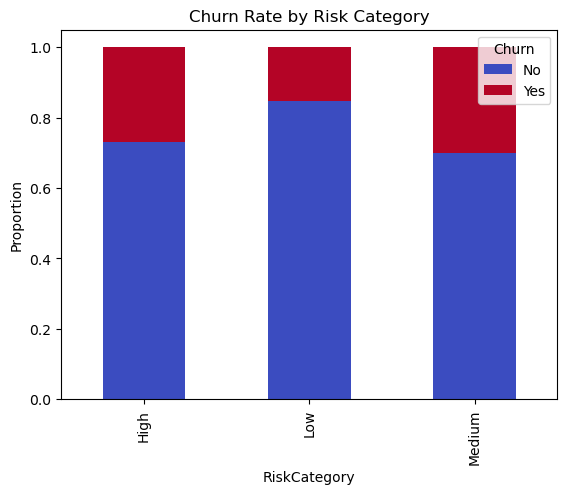

In [24]:
risk_churn = df.groupby('RiskCategory')['Churn'].value_counts(normalize=True).unstack()
risk_churn.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Churn Rate by Risk Category')
plt.ylabel('Proportion')
plt.show()

In [25]:
df.groupby('RiskCategory')['Churn'].value_counts(normalize=True).round(2)

RiskCategory  Churn
High          No       0.73
              Yes      0.27
Low           No       0.85
              Yes      0.15
Medium        No       0.70
              Yes      0.30
Name: proportion, dtype: float64

Key Insights: 
- High-risk customers had a churn rate of 27%, showing elevated vulnerability to leaving.
- Medium-risk customers churned at 30%, slightly lower but still notable.
- Low-risk customers had the strongest retention, with only 15% churn

## Number of Customers by Risk Category

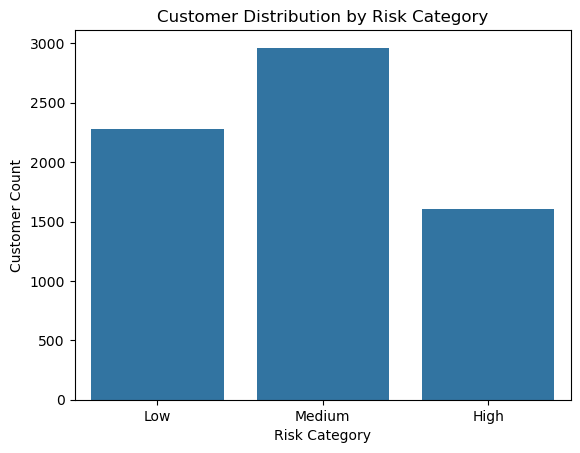

In [26]:
sns.countplot(x='RiskCategory', data=df, order=['Low', 'Medium', 'High'])
plt.title('Customer Distribution by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Customer Count')
plt.show()

## Churn by Payment Method

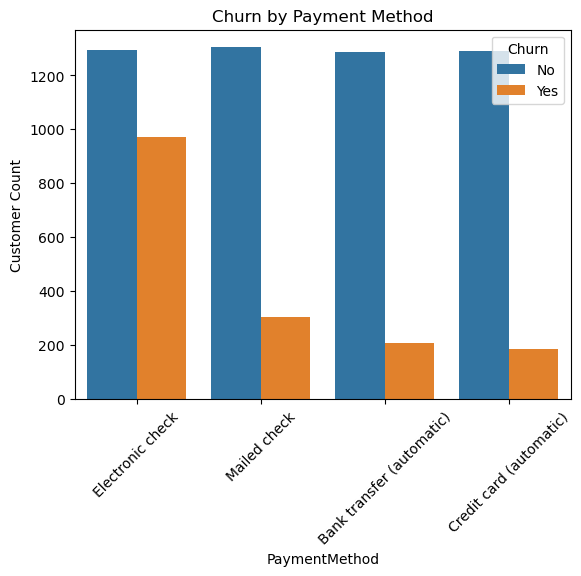

In [27]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title('Churn by Payment Method')
plt.ylabel('Customer Count')
plt.show()

In [28]:
df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).round(2)

PaymentMethod              Churn
Bank transfer (automatic)  No       0.86
                           Yes      0.14
Credit card (automatic)    No       0.87
                           Yes      0.13
Electronic check           No       0.57
                           Yes      0.43
Mailed check               No       0.81
                           Yes      0.19
Name: proportion, dtype: float64

Key Insights: 
- Electronic check users have the highest churn rate at 43%, suggesting manual payments may lead to less loyalty.
- Credit card (automatic) users show the lowest churn at 13%, followed closely by bank transfer (automatic) at 14%.
- Mailed check users also show strong retention, with only 19% churn.
- Overall, automatic payment methods are linked to better customer retention and offering incentives to switch to auto-pay could help reduce churn.


# Senior Citizens and Churn

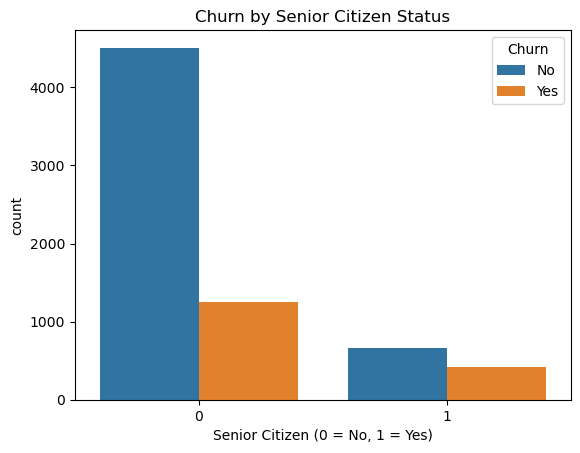

In [29]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.show()

In [30]:
df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).round(2)

SeniorCitizen  Churn
0              No       0.78
               Yes      0.22
1              No       0.61
               Yes      0.39
Name: proportion, dtype: float64

 Key Insights: Churn Rate by Senior Citizen Status
- Senior citizens had a churn rate of 39%, noticeably higher than non-seniors.
- Non-senior customers churned at 22%, showing stronger retention overall.
- This suggests older customers may face more friction which is possibly due to pricing, tech barriers or service complexity.

## Feature Engineering

Applied one-hot encoding to categorical variables

Ensured numerical columns are properly typed

Split data using stratified train-test split (80/20)

In [31]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,RiskCategory
482,8205-OTCHB,Male,0,No,No,22,No,No phone service,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),43.75,903.6,Yes,Low
4723,3950-VPYJB,Male,0,Yes,Yes,57,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,59.60,3509.4,No,Medium
393,5495-GPSRW,Male,0,No,No,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.70,419.4,No,Low
1504,5193-QLVZB,Male,0,No,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.75,6536.5,No,High
6252,2096-XOTMO,Female,0,Yes,Yes,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.35,275.9,No,Low


## Dropping unnecessary column

In [32]:
df = df.drop(columns=['customerID'])

In [33]:
df.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,RiskCategory
3368,Female,0,Yes,No,31,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),83.85,2674.15,No,Medium
5085,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No,Low


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6845 entries, 0 to 6844
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6845 non-null   object 
 1   SeniorCitizen     6845 non-null   int64  
 2   Partner           6845 non-null   object 
 3   Dependents        6845 non-null   object 
 4   tenure            6845 non-null   int64  
 5   PhoneService      6845 non-null   object 
 6   MultipleLines     6845 non-null   object 
 7   InternetService   6845 non-null   object 
 8   OnlineSecurity    6845 non-null   object 
 9   OnlineBackup      6845 non-null   object 
 10  DeviceProtection  6845 non-null   object 
 11  TechSupport       6845 non-null   object 
 12  StreamingTV       6845 non-null   object 
 13  StreamingMovies   6845 non-null   object 
 14  Contract          6845 non-null   object 
 15  PaperlessBilling  6845 non-null   object 
 16  PaymentMethod     6845 non-null   object 


## TotalCharges is numeric but stored as string

In [35]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6845 entries, 0 to 6844
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6845 non-null   object 
 1   SeniorCitizen     6845 non-null   int64  
 2   Partner           6845 non-null   object 
 3   Dependents        6845 non-null   object 
 4   tenure            6845 non-null   int64  
 5   PhoneService      6845 non-null   object 
 6   MultipleLines     6845 non-null   object 
 7   InternetService   6845 non-null   object 
 8   OnlineSecurity    6845 non-null   object 
 9   OnlineBackup      6845 non-null   object 
 10  DeviceProtection  6845 non-null   object 
 11  TechSupport       6845 non-null   object 
 12  StreamingTV       6845 non-null   object 
 13  StreamingMovies   6845 non-null   object 
 14  Contract          6845 non-null   object 
 15  PaperlessBilling  6845 non-null   object 
 16  PaymentMethod     6845 non-null   object 


In [37]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,RiskCategory
578,Male,0,Yes,Yes,63,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),83.50,5435.00,No,Medium
3973,Female,0,No,No,30,No,No phone service,DSL,No,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),40.35,1187.05,No,Low
87,Female,0,Yes,Yes,48,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1057.00,No,Low
3893,Female,0,No,No,38,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.30,743.05,No,Low
4162,Male,0,No,No,50,No,No phone service,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,35.00,1782.40,No,Low


## Checking for Nan Values in the data

In [38]:
df.isnull().values.any()

np.True_

In [39]:
df.isnull().sum().sum()

np.int64(11)

### This means there are 11 NaN values across all columns.

In [40]:
df['TotalCharges'].isna().sum()

np.int64(11)

As it seems all the 11 null values are coming from column TotalCharges

In [41]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\anamv\AppData\Local\Temp\ipykernel_38908\2840544469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [42]:
df['TotalCharges'].isna().sum()

np.int64(0)

### We have removed the NaN values from the dataset

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6845 entries, 0 to 6844
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6845 non-null   object 
 1   SeniorCitizen     6845 non-null   int64  
 2   Partner           6845 non-null   object 
 3   Dependents        6845 non-null   object 
 4   tenure            6845 non-null   int64  
 5   PhoneService      6845 non-null   object 
 6   MultipleLines     6845 non-null   object 
 7   InternetService   6845 non-null   object 
 8   OnlineSecurity    6845 non-null   object 
 9   OnlineBackup      6845 non-null   object 
 10  DeviceProtection  6845 non-null   object 
 11  TechSupport       6845 non-null   object 
 12  StreamingTV       6845 non-null   object 
 13  StreamingMovies   6845 non-null   object 
 14  Contract          6845 non-null   object 
 15  PaperlessBilling  6845 non-null   object 
 16  PaymentMethod     6845 non-null   object 


In [44]:
df.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,RiskCategory
2222,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Mailed check,107.45,7576.7,No,High
3582,Male,0,Yes,No,71,Yes,No,DSL,Yes,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),54.50,3778.2,No,Medium


## Convert Churn to 0/1

In [45]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

## One-hot encode all remaining categorical columns

In [46]:
df = pd.get_dummies(df, drop_first=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6845 entries, 0 to 6844
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          6845 non-null   int64  
 1   tenure                                 6845 non-null   int64  
 2   MonthlyCharges                         6845 non-null   float64
 3   TotalCharges                           6845 non-null   float64
 4   Churn                                  6845 non-null   int64  
 5   gender_Male                            6845 non-null   bool   
 6   Partner_Yes                            6845 non-null   bool   
 7   Dependents_Yes                         6845 non-null   bool   
 8   PhoneService_Yes                       6845 non-null   bool   
 9   MultipleLines_No phone service         6845 non-null   bool   
 10  MultipleLines_Yes                      6845 non-null   bool   
 11  Inte

#### Next, I prepared the data for machine learning.
#### I applied one-hot encoding to categorical columns using get_dummies and defined X as the feature matrix and y as the churn label

In [48]:
df.sample(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,RiskCategory_Low,RiskCategory_Medium
2634,0,24,20.40,482.80,0,False,True,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,False,True,False
1195,0,49,100.85,4847.35,0,False,True,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False


In [49]:
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [50]:
df.sample(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,RiskCategory_Low,RiskCategory_Medium
446,0,1,75.1,75.1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
5086,0,7,96.2,639.7,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


## Defining the Target Variable

In [51]:
x = df.drop('Churn', axis=1)
y = df['Churn']

## 80:20 Split

In [52]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, stratify=y)

In [53]:
df.shape

(6845, 33)

In [54]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((5476, 32), (1369, 32), (5476,), (1369,))

In [55]:
# scale the data using min-max scalar
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [56]:
# Fit-transform on train data
xtrain_scaled = scale.fit_transform(xtrain)
xtest_scaled = scale.transform(xtest)

## <font color='chocolate'>**1. Logistic Regression**</font>

In [57]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression().fit(xtrain_scaled, ytrain)

In [58]:
# Predict the loan eligibility on testing set and calculate its accuracy.
# First, from sklearn.metrics import accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

ypred = lrmodel.predict(xtest_scaled)

accuracy_score(ypred, ytest)

0.8203067932797663

In [59]:
ypred

array([1, 0, 0, ..., 0, 1, 0])

In [60]:
ytest

291     0
2811    0
4146    1
4204    0
3140    0
4092    0
3667    0
3209    0
5600    0
3158    0
2479    0
2941    1
6627    0
5254    0
1461    0
6328    1
3291    1
5272    0
5341    0
5681    0
2168    1
368     1
2138    0
2526    0
149     1
5364    0
1593    1
3944    0
3002    0
4547    0
4699    0
5850    0
1726    0
2513    0
5296    0
2594    0
3126    1
5502    0
4320    0
1579    1
5640    0
2786    0
4377    0
6502    0
3350    0
6322    0
5690    0
3137    0
1702    1
501     0
6079    0
4736    0
1241    0
3736    1
6171    0
2344    0
4625    1
955     0
5249    0
3993    0
264     0
6178    0
563     0
5766    0
4855    0
3927    0
3163    0
4817    0
3194    0
21      0
2123    1
2782    1
3247    0
534     0
3074    0
874     0
5010    0
5992    0
1137    0
4983    0
1592    0
1529    1
1351    0
3658    0
1681    1
3338    0
2385    1
351     0
450     1
1051    0
3236    0
5591    0
2538    0
2478    0
4585    0
5790    0
2774    0
1543    0
3409    0
5194    0


In [61]:
# Print the confusion matrix
confusion_matrix(ytest, ypred)

array([[940,  95],
       [151, 183]])

In [62]:
# to check how probabilities are assigned
pypred = lrmodel.predict_proba(xtest_scaled)
pypred

array([[0.43567988, 0.56432012],
       [0.82067519, 0.17932481],
       [0.62599962, 0.37400038],
       ...,
       [0.7344533 , 0.2655467 ],
       [0.24533987, 0.75466013],
       [0.8277986 , 0.1722014 ]])

In [64]:
# to change the default threshold and to make it 70% and above
proba_pred = (pypred[:, 1] >= 0.7).astype(int)

In [65]:
accuracy_score(proba_pred, ytest)

0.7991234477720964

## <font color='chocolate'>**2. Decision Tree**

In [66]:
# Import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Model
dtmodel = DecisionTreeClassifier().fit(xtrain_scaled, ytrain)

## Decision tree Predictions

In [67]:
ypred = dtmodel.predict(xtest_scaled)

accuracy_score(ypred, ytest)

0.7669831994156319

## Decision tree Predictions

In [68]:
# Let's list the tunable hyperparameters for Random Forest algorithm
dtmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

## <font color='chocolate'>**3. Random Forest**

In [69]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain_scaled,ytrain)

RandomForestClassifier()

In [70]:
ypred = rfmodel.predict(xtest_scaled)

accuracy_score(ypred, ytest)

0.8224981738495252

### <font color='chocolate'> Hyperparameter Tuning

In [71]:
print('Anam Vakil')
rfmodel = RandomForestClassifier(n_estimators=2,
                                 max_depth=2,
                                 max_features=10)
rfmodel.fit(xtrain, ytrain)

# predict on xtest
ypred = rfmodel.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(ypred, ytest),'\n')
print(confusion_matrix(ytest, ypred))

Anam Vakil
0.8159240321402483 

[[971  64]
 [188 146]]


In [72]:
# plot a feature importance chart
rfmodel.feature_importances_

array([0.        , 0.34595481, 0.        , 0.1647282 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15424538, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.3350716 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

## Cross Validation

In [73]:
# import rquired libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# if you have a imbalanced dataset, you can use stratifiedKFold
from sklearn.model_selection import StratifiedKFold

### For Logistic Regression

In [74]:
print('Anam Vakil')
# Set up a KFold cross-validation
kfold = KFold(n_splits=5)

# Use cross-validation to evaluate the model
lr_scores = cross_val_score(lrmodel, xtrain_scaled, ytrain, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores:", lr_scores)

# Print the mean accuracy and standard deviation of the model
print("Mean accuracy:", lr_scores.mean())
print("Standard deviation:", lr_scores.std())

Anam Vakil
Accuracy scores: [0.80656934 0.85388128 0.84292237 0.81187215 0.82374429]
Mean accuracy: 0.8277978868779788
Standard deviation: 0.018054392068697307


## For Random Forest

In [75]:
print('Anam Vakil')
# Set up a KFold cross-validation
kfold = KFold(n_splits=5)

# Use cross-validation to evaluate the model
rf_scores = cross_val_score(rfmodel, xtrain_scaled, ytrain, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores:", rf_scores)

# Print the mean accuracy and standard deviation of the model
print("Mean accuracy:", rf_scores.mean())
print("Standard deviation:", rf_scores.std())

Anam Vakil
Accuracy scores: [0.79288321 0.80547945 0.78356164 0.7369863  0.76073059]
Mean accuracy: 0.7759282405092824
Standard deviation: 0.024357574151814717


# 70:30 Split

In [76]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, stratify=y)

In [77]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((4791, 32), (2054, 32), (4791,), (2054,))

## Normalization

In [78]:
# scale the data using min-max scalar
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() #normalize
xtrain.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,RiskCategory_Low,RiskCategory_Medium
2886,0,65,109.30,7337.55,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
4176,0,35,72.25,2568.55,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1


In [79]:
xtrain_scaled = scale.fit_transform(xtrain)
xtest_scaled = scale.transform(xtest)

## <font color='chocolate'>**1. Logistic Regression**</font>

In [80]:
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression().fit(xtrain_scaled, ytrain)

In [81]:
# Predict the loan eligibility on testing set and calculate its accuracy.
# First, from sklearn.metrics import accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

ypred = lrmodel.predict(xtest_scaled)

accuracy_score(ypred, ytest)

0.8261927945472249

In [82]:
ypred

array([1, 0, 1, ..., 0, 0, 0])

In [83]:
ytest

4510    1
5255    0
1573    1
185     0
2604    0
3638    0
779     0
5112    0
6379    0
5155    0
5679    0
3559    0
544     0
953     0
2001    1
6801    0
5347    0
6539    0
1263    0
2484    0
4005    0
5081    0
3788    0
2489    0
2402    0
4226    0
6050    0
4393    1
4672    0
6690    0
4046    0
2973    0
1987    0
300     1
3772    0
4264    1
1776    0
5150    0
3587    0
6626    1
506     0
1517    0
1672    1
2087    0
2234    0
1849    0
1018    1
2600    0
4231    0
2198    0
2420    1
1857    0
6792    0
6223    0
2066    0
3693    0
5268    0
295     1
3671    0
5926    0
2472    0
2811    0
3222    0
4577    0
4755    0
4944    0
1359    0
824     0
5077    0
785     1
4737    0
74      0
469     0
1570    0
2138    0
885     0
6242    0
2791    0
2093    0
3643    1
3572    1
6136    0
247     1
5663    0
4406    1
26      1
2709    0
3267    0
1188    0
5404    0
1393    0
2607    1
2627    1
6489    0
3666    0
2982    0
2951    0
3609    0
3978    0
549     0


In [84]:
# Print the confusion matrix
confusion_matrix(ytest, ypred)

array([[1421,  132],
       [ 225,  276]])

In [86]:
# to check how probabilities are assigned
pypred = lrmodel.predict_proba(xtest_scaled)
pypred

array([[0.22761939, 0.77238061],
       [0.75201401, 0.24798599],
       [0.387627  , 0.612373  ],
       ...,
       [0.88319075, 0.11680925],
       [0.88718115, 0.11281885],
       [0.64503873, 0.35496127]])

In [87]:
# to change the default threshold and to make it 70% and above
proba_pred = (pypred[:, 1] >= 0.7).astype(int)

In [88]:
accuracy_score(proba_pred, ytest)

0.7916260954235638

## <font color='chocolate'>**2. Decision Tree**

In [89]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier().fit(xtrain_scaled, ytrain)
ypred = dtmodel.predict(xtest_scaled)
accuracy_score(ypred, ytest) ##decision tree prediction

0.7614410905550146

In [90]:
dtmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

## <font color='chocolate'>**3. Random Forest**

In [91]:
rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain_scaled,ytrain)

RandomForestClassifier()

In [92]:
ypred = rfmodel.predict(xtest_scaled)

accuracy_score(ypred, ytest)

0.8154819863680624

#### 78.4% of the predictions matched the actual outcomes in the test set.

## Hypertuning Parameters

In [93]:
rfmodel = RandomForestClassifier(n_estimators=2,
                                 max_depth=2,
                                 max_features=10)
rfmodel.fit(xtrain, ytrain)

# predict on xtest
ypred = rfmodel.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(ypred, ytest),'\n')
print(confusion_matrix(ytest, ypred))

0.7974683544303798 

[[1475   78]
 [ 338  163]]


In [94]:
# plot a feature importance chart
rfmodel.feature_importances_

array([0.        , 0.47946992, 0.15272864, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08611359, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.28168785, 0.        ,
       0.        , 0.        ])

## Cross Validation

In [96]:
# import rquired libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# if you have a imbalanced dataset, you can use stratifiedKFold
from sklearn.model_selection import StratifiedKFold

### For Logistic Regression

In [97]:
# Set up a KFold cross-validation
kfold = KFold(n_splits=5)

# Use cross-validation to evaluate the model
lr_scores = cross_val_score(lrmodel, xtrain_scaled, ytrain, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores:", lr_scores)

# Print the mean accuracy and standard deviation of the model
print("Mean accuracy:", lr_scores.mean())
print("Standard deviation:", lr_scores.std())

Accuracy scores: [0.82273201 0.83298539 0.83194154 0.82776618 0.82881002]
Mean accuracy: 0.8288470288074086
Standard deviation: 0.003612895261292371


## Random Forest

In [98]:
# Set up a KFold cross-validation
kfold = KFold(n_splits=5)

# Use cross-validation to evaluate the model
rf_scores = cross_val_score(rfmodel, xtrain_scaled, ytrain, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores:", rf_scores)

# Print the mean accuracy and standard deviation of the model
print("Mean accuracy:", rf_scores.mean())
print("Standard deviation:", rf_scores.std())

Accuracy scores: [0.81021898 0.81941545 0.81524008 0.79645094 0.78601253]
Mean accuracy: 0.8054675952029016
Standard deviation: 0.012429155911124696


# 85:15 Split

In [99]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.15, stratify=y)

## Normalization

In [100]:
# scale the data using min-max scalar
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
xtrain.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,RiskCategory_Low,RiskCategory_Medium
953,0,72,23.75,1679.25,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
6387,0,8,19.70,130.25,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0


In [101]:
# Fit-transform on train data
xtrain_scaled = scale.fit_transform(xtrain)
xtest_scaled = scale.transform(xtest)

## <font color='chocolate'>**1. Logistic Regression**</font>

In [102]:
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression().fit(xtrain_scaled, ytrain)

In [103]:
# Predict the loan eligibility on testing set and calculate its accuracy.
# First, from sklearn.metrics import accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

ypred = lrmodel.predict(xtest_scaled)

accuracy_score(ypred, ytest)

0.8257059396299903

In [104]:
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [105]:
ytest

4642    0
5302    0
412     0
274     0
6359    0
3569    0
5447    1
6599    0
1083    0
6560    1
5825    1
3920    0
3129    0
5150    0
1354    0
439     0
1129    0
4969    0
1717    0
42      0
3978    0
650     0
4939    0
1884    0
3036    0
5507    0
5979    0
340     0
1382    0
731     0
622     1
2614    1
3124    0
2256    1
4547    0
4238    0
6705    0
14      0
3881    0
6844    0
347     0
3878    1
3713    0
39      1
285     0
1624    0
5465    0
864     1
2460    0
3955    1
2721    0
6732    0
2421    0
2121    0
5144    0
5935    0
4221    1
6676    1
2837    0
237     0
4665    0
4744    0
2004    0
5266    1
6195    0
5817    0
5689    0
2949    0
6747    0
5177    0
6320    0
4016    0
2724    1
6144    0
6125    0
2210    0
4520    0
823     0
3954    0
713     0
5217    1
6775    1
5159    0
3857    0
6461    0
3567    0
2260    0
2745    0
5556    0
1900    1
190     0
3006    0
693     0
921     1
6114    0
4717    0
5665    0
3056    0
2584    0
4018    1


In [106]:
# Print the confusion matrix
confusion_matrix(ytest, ypred)

array([[696,  80],
       [ 99, 152]])

In [107]:
# to check how probabilities are assigned
pypred = lrmodel.predict_proba(xtest_scaled)
pypred

array([[0.91150232, 0.08849768],
       [0.99642571, 0.00357429],
       [0.98386492, 0.01613508],
       ...,
       [0.67042039, 0.32957961],
       [0.97447571, 0.02552429],
       [0.92427027, 0.07572973]])

In [108]:
# to change the default threshold and to make it 70% and above
proba_pred = (pypred[:, 1] >= 0.7).astype(int)

In [109]:
accuracy_score(proba_pred, ytest)

0.8120740019474196

## <font color='chocolate'>**2. Decision Tree**

In [110]:
dtmodel = DecisionTreeClassifier().fit(xtrain_scaled, ytrain)
ypred = dtmodel.predict(xtest_scaled)

accuracy_score(ypred, ytest)

0.7653359298928919

In [111]:
dtmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

## <font color='chocolate'>**3. Random Forest**

In [112]:
rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain_scaled,ytrain)

RandomForestClassifier()

In [113]:
ypred = rfmodel.predict(xtest_scaled)

accuracy_score(ypred, ytest)

0.8305744888023369

## Hypertuning Parameters

In [114]:
rfmodel = RandomForestClassifier(n_estimators=2,
                                 max_depth=2,
                                 max_features=10)
rfmodel.fit(xtrain, ytrain)

# predict on xtest
ypred = rfmodel.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(ypred, ytest),'\n')
print(confusion_matrix(ytest, ypred))

0.7575462512171373 

[[666 110]
 [139 112]]


In [115]:
# plot a feature importance chart
rfmodel.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08756278, 0.        ,
       0.07094772, 0.        , 0.        , 0.        , 0.        ,
       0.04176497, 0.        , 0.        , 0.        , 0.        ,
       0.12860737, 0.        , 0.        , 0.67111716, 0.        ,
       0.        , 0.        ])

## Cross Validation

In [116]:
# import rquired libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# if you have a imbalanced dataset, you can use stratifiedKFold
from sklearn.model_selection import StratifiedKFold

### For Logistic Regression

In [117]:
# Set up a KFold cross-validation
kfold = KFold(n_splits=5)

# Use cross-validation to evaluate the model
lr_scores = cross_val_score(lrmodel, xtrain_scaled, ytrain, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores:", lr_scores)

# Print the mean accuracy and standard deviation of the model
print("Mean accuracy:", lr_scores.mean())
print("Standard deviation:", lr_scores.std())

Accuracy scores: [0.82044674 0.83075601 0.82989691 0.83490972 0.82373173]
Mean accuracy: 0.8279482201794742
Standard deviation: 0.0051806291368095645


### For Random Forest

In [119]:
# Set up a KFold cross-validation
kfold = KFold(n_splits=5)

# Use cross-validation to evaluate the model
rf_scores = cross_val_score(rfmodel, xtrain_scaled, ytrain, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores:", rf_scores)

# Print the mean accuracy and standard deviation of the model
print("Mean accuracy:", rf_scores.mean())
print("Standard deviation:", rf_scores.std())

Accuracy scores: [0.74828179 0.77061856 0.79209622 0.7927773  0.79105761]
Mean accuracy: 0.7789662946580268
Standard deviation: 0.01743882134302247


## 10. Conclusion

This project applied a complete machine learning workflow to the Telco Customer Churn dataset, beginning with data cleaning, exploratory analysis, and feature engineering, followed by model development and evaluation. Important behavioral patterns were identified, including high churn rates among month-to-month customers, electronic check users, and senior citizens—groups that consistently showed greater likelihood of discontinuing service.

Multiple algorithms were evaluated, including Logistic Regression, Random Forest, and a baseline model. Although Random Forest initially showed strong performance on a single train–test split, Logistic Regression demonstrated greater reliability and stability when evaluated using cross-validation. As a result, Logistic Regression was selected as the final model due to its balanced accuracy, interpretability, and consistent performance across multiple data splits.

A lightweight Streamlit prototype was also developed to illustrate how the final model can be deployed in a practical environment. This interface allows users to input customer attributes and receive real-time churn predictions, demonstrating how analytical insights can be operationalized into decision-support tools.

Overall, the project highlights how structured data preprocessing, thoughtful feature engineering, and careful model evaluation contribute to building reliable churn-prediction systems. The final model provides a strong foundation for future enhancements, including additional feature development, hyperparameter tuning, and integration into larger business intelligence pipelines.